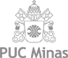
<B>PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS

NÚCLEO DE EDUCAÇÃO A DISTÂNCIA

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Título: Segmentação de Vendedores do marketplace Olist Store em 2017

Aluno: Alexandre Luís Nunes Cardiga</B>


<B>Nome:</B> 03_03_Modelos_MeanShift.ipynb

<B>Data:</B> 10/04/2022
    
<a class="anchor" id="etapas"></a>

## Indice

1. [Redução Dimensões](#reduzdimi)<br>
&emsp;1.1 [PCA](#pca)<br>
&emsp;1.2 [t-SNE](#tsne)<br>
&emsp;1.3 [UMAP](#uma)<br>
2. [Sem Redução](#semr)<br>
3. [Análise do dataframe df_score](#analise)<br>


<p><b>Localização Projeto: </b> <a href = 'https://github.com/Alexandre-316/Projeto_Ciencia_de_Dados' target = "_blank">Git Hub</a></p>

In [1]:
# Apaga todas as variáveis
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%whos

Interactive namespace is empty.


In [3]:
import sys
import os
import pandas as pd
import numpy as np
import requests
import math
import matplotlib.pyplot as plt


import seaborn as sns
#import datetime

from datetime import datetime
from random import randrange, uniform

from scipy import stats
from scipy.stats    import normaltest, kstest
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples,silhouette_score, davies_bouldin_score, calinski_harabasz_score
from random import randrange, uniform
from sklearn.cluster import MeanShift, estimate_bandwidth

import warnings 
if not sys.warnoptions:
    #warnings.filterwarnings('ignore')
    warnings.simplefilter('ignore')

# Define a pasta onde está o arquivo minhas_funcoes.py
sys.path.insert(0, '../Lib')

# Importar minhas_funcoes.py
import minhas_funcoes as mf

import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

caminho = '../Data/'
caminho_temp = '../Template/'

#exibe todas as colunas
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 150)
#pd.set_option('display.max_columns', 999999999)
#pd.set_option('display.max_rows', 999999999)
pd.set_option('display.max_rows', 150)

## <a class="anchor" id="reduzdimi">1. Reduções de Dimensões</a>
[Retorna ao Indice](#etapas)

In [4]:
df_minmax_PCA_9_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_PCA_9_features.xlsx',index_col=0)
df_robust_PCA_9_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_PCA_9_features.xlsx',index_col=0)
df_power_PCA_15_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_PCA_15_features.xlsx',index_col=0)


In [5]:
#df_abt = pd.read_excel(caminho_temp+'01_Coleta_Processamento_df_Analytic_Base_Table.xlsx')
df_minmax_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_TSNE_2_features.xlsx',index_col=0)
df_robust_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_TSNE_2_features.xlsx',index_col=0)
df_power_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_TSNE_2_features.xlsx',index_col=0)

In [6]:
df_minmax_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_SemReducao_17_features.xlsx',index_col=0)
df_robust_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_SemReducao_17_features.xlsx',index_col=0)
df_power_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_SemReducao_17_features.xlsx',index_col=0)

In [7]:
df_minmax_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_UMAP_2_features.xlsx',index_col=0)
df_robust_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_UMAP_2_features.xlsx',index_col=0)
df_power_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_UMAP_2_features.xlsx',index_col=0)

In [8]:
df_abt = pd.read_excel(caminho_temp+'01_Coleta_Processamento_df_Analytic_Base_Table.xlsx')
#sem correlação
df_abt_sc=pd.read_excel(caminho_temp+'02_Coleta_Processamento_df_abt_sem_correlacao.xlsx')

In [9]:
df_abt_= df_abt_sc.select_dtypes(include=["int64", "float64"])
df_score= pd.DataFrame(columns= ['Algor.','Transf.', 'Red.Dim.','Features','quantile','clusters','silhouette', 'davies', 'calinski'])


In [10]:
df_abt.shape,df_abt_.shape

((1658, 114), (1658, 17))

## <a class="anchor" id="pca">1.1. PCA</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,MinMaxScaler,PCA,9,0.835,3,0.513884,0.955855,13.012338
1,MEANSHIFT,MinMaxScaler,PCA,9,0.385,8,0.388745,1.147785,32.846888
2,MEANSHIFT,MinMaxScaler,PCA,9,0.148,34,0.093160,1.046199,26.262596
3,MEANSHIFT,MinMaxScaler,PCA,9,0.228,21,0.138640,1.126178,26.352241
4,MEANSHIFT,MinMaxScaler,PCA,9,0.794,3,0.496245,0.958051,34.370523
5,MEANSHIFT,MinMaxScaler,PCA,9,0.275,13,0.237858,1.133076,30.579250
6,MEANSHIFT,MinMaxScaler,PCA,9,0.813,3,0.513884,0.955855,13.012338
7,MEANSHIFT,MinMaxScaler,PCA,9,0.296,10,0.299648,1.334606,36.918008
8,MEANSHIFT,MinMaxScaler,PCA,9,0.645,3,0.494360,1.145155,14.021589
9,MEANSHIFT,MinMaxScaler,PCA,9,0.192,24,0.100618,1.150359,30.603636


Wall time: 26.7 s


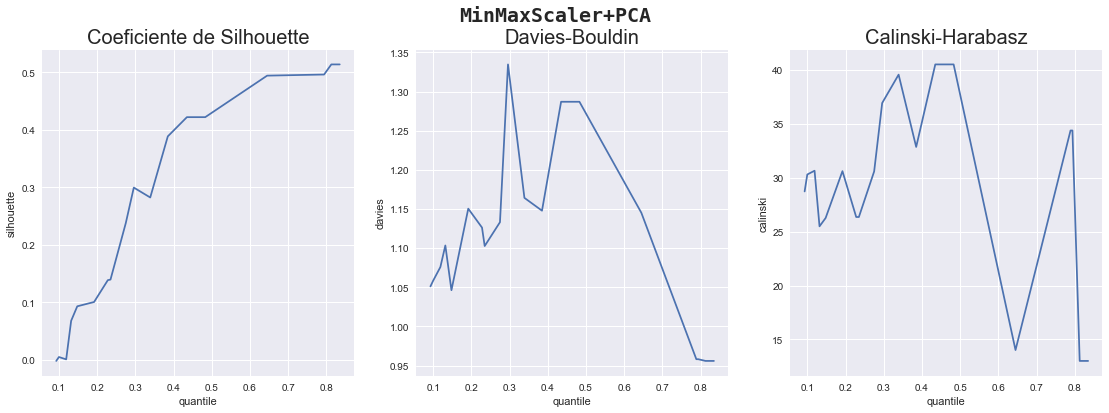

In [11]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_minmax_PCA_9_features,0.01, 0.9, (19,6),'MinMaxScaler+PCA','MEANSHIFT','MinMaxScaler','PCA')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,RobustScaler,PCA,9,0.086,90,0.451929,0.551286,172.633460
1,MEANSHIFT,RobustScaler,PCA,9,0.286,74,0.515510,0.527457,158.485953
2,MEANSHIFT,RobustScaler,PCA,9,0.575,59,0.589342,0.653655,151.664785
3,MEANSHIFT,RobustScaler,PCA,9,0.798,39,0.626392,0.524384,163.905547
4,MEANSHIFT,RobustScaler,PCA,9,0.777,44,0.616996,0.716724,154.653966
5,MEANSHIFT,RobustScaler,PCA,9,0.092,89,0.459489,0.475300,186.319030
6,MEANSHIFT,RobustScaler,PCA,9,0.096,89,0.465695,0.486837,189.492969
7,MEANSHIFT,RobustScaler,PCA,9,0.044,113,0.431029,0.566426,174.254300
8,MEANSHIFT,RobustScaler,PCA,9,0.134,81,0.507597,0.519010,188.641279
9,MEANSHIFT,RobustScaler,PCA,9,0.690,55,0.589349,0.653360,153.319531


Wall time: 19.6 s


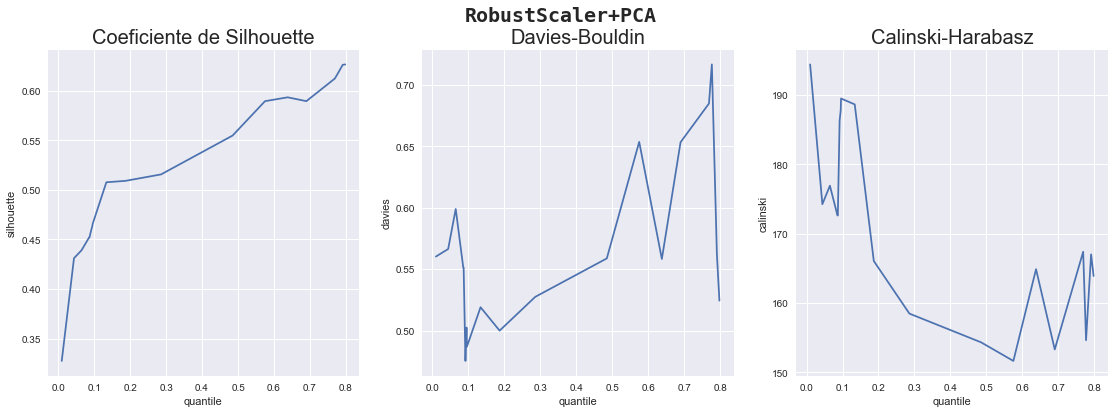

In [12]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_robust_PCA_9_features,0.01,0.9, (19,6),'RobustScaler+PCA','MEANSHIFT','RobustScaler','PCA')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,PowerTransformer,PCA,15,0.777,2,0.697833,0.217113,19.294625
1,MEANSHIFT,PowerTransformer,PCA,15,0.848,2,0.697833,0.217113,19.294625
2,MEANSHIFT,PowerTransformer,PCA,15,0.322,2,0.358731,1.318354,149.167224
3,MEANSHIFT,PowerTransformer,PCA,15,0.577,2,0.358731,1.318354,149.167224
4,MEANSHIFT,PowerTransformer,PCA,15,0.024,18,0.146829,1.518006,46.162449
5,MEANSHIFT,PowerTransformer,PCA,15,0.154,5,0.272647,1.334859,73.673441
6,MEANSHIFT,PowerTransformer,PCA,15,0.514,2,0.358731,1.318354,149.167224
7,MEANSHIFT,PowerTransformer,PCA,15,0.216,4,0.272931,1.415595,95.854038
8,MEANSHIFT,PowerTransformer,PCA,15,0.117,7,0.265819,1.172991,52.139469
9,MEANSHIFT,PowerTransformer,PCA,15,0.671,2,0.697833,0.217113,19.294625


Wall time: 14 s


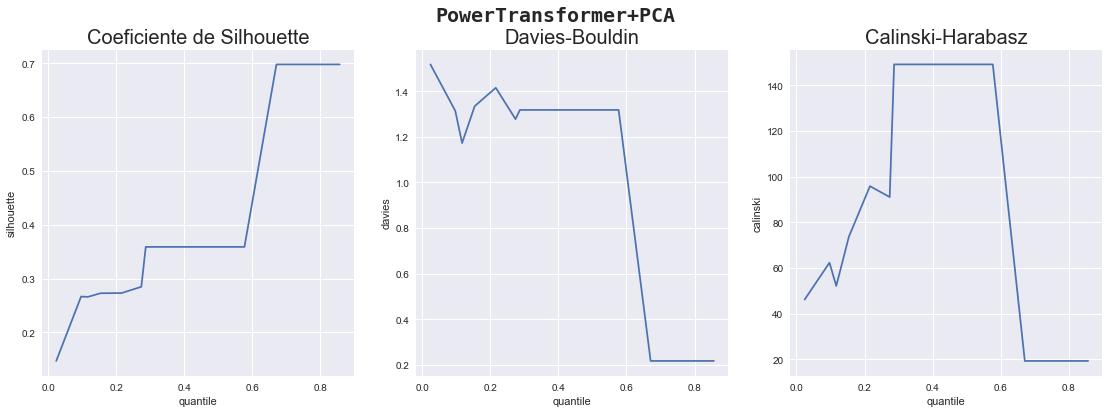

In [13]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_power_PCA_15_features,0.01,0.9, (19,6),'PowerTransformer+PCA','MEANSHIFT','PowerTransformer','PCA')


## <a class="anchor" id="tsne">1.2. t-SNE</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,MinMaxScaler,t-SNE,2,0.011,102,0.356291,0.794925,2566.379835
1,MEANSHIFT,MinMaxScaler,t-SNE,2,0.078,8,0.445226,0.724237,2290.241189
2,MEANSHIFT,MinMaxScaler,t-SNE,2,0.061,10,0.445484,0.721635,2243.431348
3,MEANSHIFT,MinMaxScaler,t-SNE,2,0.302,2,0.445944,0.898544,1752.405306
4,MEANSHIFT,MinMaxScaler,t-SNE,2,0.276,2,0.455989,0.885911,1782.508842
5,MEANSHIFT,MinMaxScaler,t-SNE,2,0.341,2,0.453293,0.888121,1783.132415
6,MEANSHIFT,MinMaxScaler,t-SNE,2,0.238,3,0.448430,0.837049,1880.834499
7,MEANSHIFT,MinMaxScaler,t-SNE,2,0.295,2,0.453921,0.894550,1770.832812
8,MEANSHIFT,MinMaxScaler,t-SNE,2,0.258,2,0.457472,0.869295,1780.780399
9,MEANSHIFT,MinMaxScaler,t-SNE,2,0.204,4,0.475956,0.761845,2214.752709


Wall time: 9.38 s


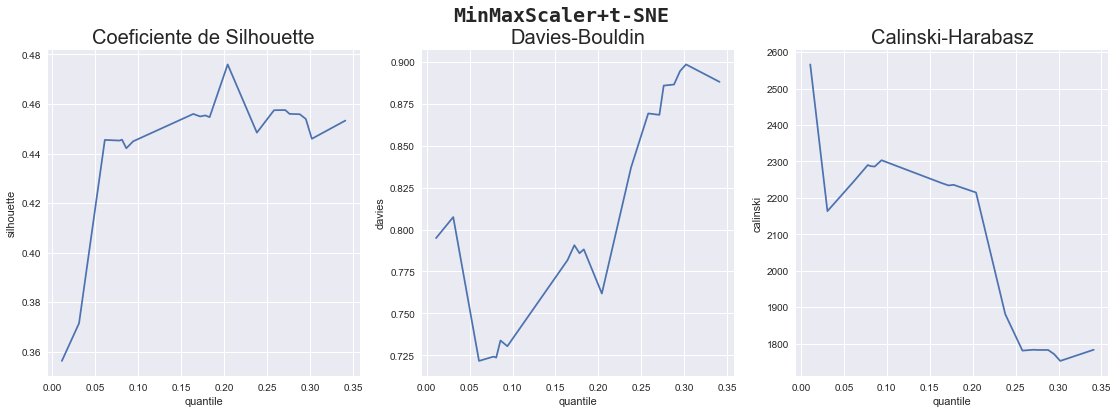

In [14]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_minmax_TSNE_2_features, 0.01, 0.35, (19,6),'MinMaxScaler+t-SNE','MEANSHIFT','MinMaxScaler','t-SNE')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,RobustScaler,t-SNE,2,0.069,9,0.431506,0.727307,1947.860986
1,MEANSHIFT,RobustScaler,t-SNE,2,0.011,129,0.337847,0.785720,2255.450425
2,MEANSHIFT,RobustScaler,t-SNE,2,0.079,10,0.402988,0.800251,1890.897462
3,MEANSHIFT,RobustScaler,t-SNE,2,0.079,10,0.402988,0.800251,1890.897462
4,MEANSHIFT,RobustScaler,t-SNE,2,0.020,37,0.349526,0.868419,2111.394346
5,MEANSHIFT,RobustScaler,t-SNE,2,0.031,23,0.395532,0.808977,2174.168554
6,MEANSHIFT,RobustScaler,t-SNE,2,0.042,15,0.404190,0.810828,2188.226437
7,MEANSHIFT,RobustScaler,t-SNE,2,0.045,15,0.409670,0.788665,2050.108195
8,MEANSHIFT,RobustScaler,t-SNE,2,0.089,6,0.387567,0.825506,1549.717355
9,MEANSHIFT,RobustScaler,t-SNE,2,0.046,13,0.418787,0.770584,2104.569140


Wall time: 19.8 s


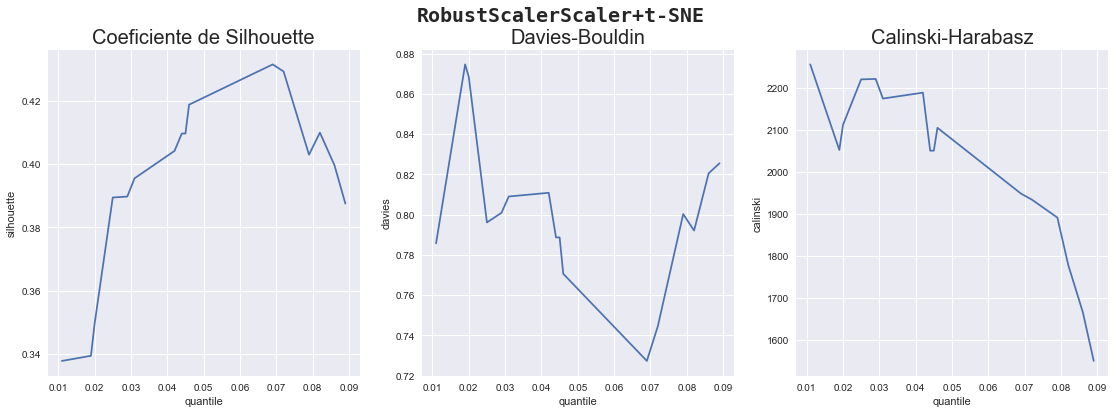

In [15]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_robust_TSNE_2_features, 0.01, 0.1, (19,6),'RobustScalerScaler+t-SNE','MEANSHIFT','RobustScaler','t-SNE')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,PowerTransformer,t-SNE,2,0.071,8,0.426760,0.705650,2547.332695
1,MEANSHIFT,PowerTransformer,t-SNE,2,0.141,4,0.380270,0.804089,2169.674271
2,MEANSHIFT,PowerTransformer,t-SNE,2,0.138,4,0.380158,0.803957,2168.559641
3,MEANSHIFT,PowerTransformer,t-SNE,2,0.051,13,0.403760,0.802031,2857.234841
4,MEANSHIFT,PowerTransformer,t-SNE,2,0.182,3,0.411358,0.770671,1806.720664
5,MEANSHIFT,PowerTransformer,t-SNE,2,0.187,3,0.411532,0.776373,1837.664278
6,MEANSHIFT,PowerTransformer,t-SNE,2,0.124,7,0.438532,0.753817,2852.671552
7,MEANSHIFT,PowerTransformer,t-SNE,2,0.043,16,0.402486,0.811809,2885.645755
8,MEANSHIFT,PowerTransformer,t-SNE,2,0.185,3,0.409550,0.775755,1809.439846
9,MEANSHIFT,PowerTransformer,t-SNE,2,0.170,3,0.409303,0.756388,1698.231362


Wall time: 11.4 s


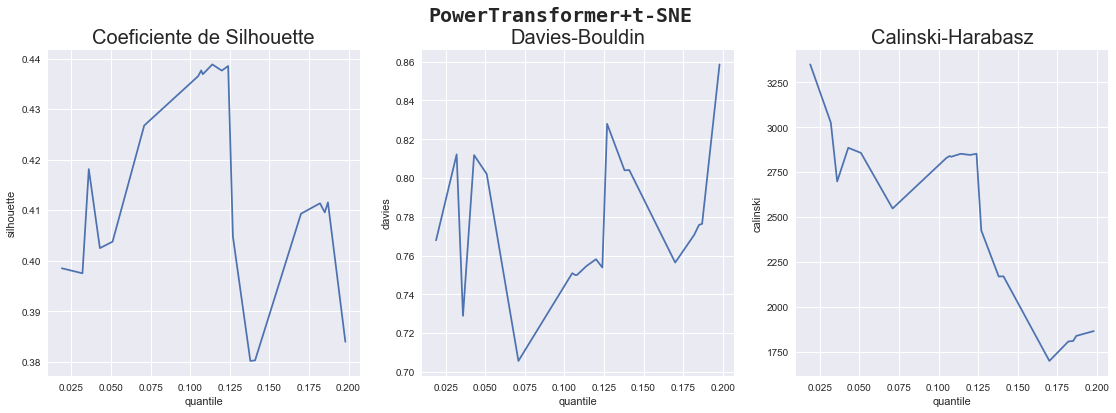

In [16]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_power_TSNE_2_features, 0.01, 0.2, (19,6),'PowerTransformer+t-SNE','MEANSHIFT','PowerTransformer','t-SNE')


## <a class="anchor" id="uma">1.3. UMAP</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,MinMaxScaler,UMAP,2,0.147,5,0.475611,0.783024,2517.788657
1,MEANSHIFT,MinMaxScaler,UMAP,2,0.135,5,0.495640,0.699586,2647.577819
2,MEANSHIFT,MinMaxScaler,UMAP,2,0.235,4,0.495286,0.711715,2626.685838
3,MEANSHIFT,MinMaxScaler,UMAP,2,0.274,2,0.483927,0.755560,2055.188753
4,MEANSHIFT,MinMaxScaler,UMAP,2,0.020,48,0.405957,0.765371,3478.091559
5,MEANSHIFT,MinMaxScaler,UMAP,2,0.212,5,0.459027,0.795730,2565.977788
6,MEANSHIFT,MinMaxScaler,UMAP,2,0.266,3,0.466723,0.861626,2269.090828
7,MEANSHIFT,MinMaxScaler,UMAP,2,0.112,7,0.450037,0.807893,2665.061155
8,MEANSHIFT,MinMaxScaler,UMAP,2,0.150,6,0.449000,0.807891,2263.123169
9,MEANSHIFT,MinMaxScaler,UMAP,2,0.044,13,0.460101,0.685962,2557.544440


Wall time: 8.34 s


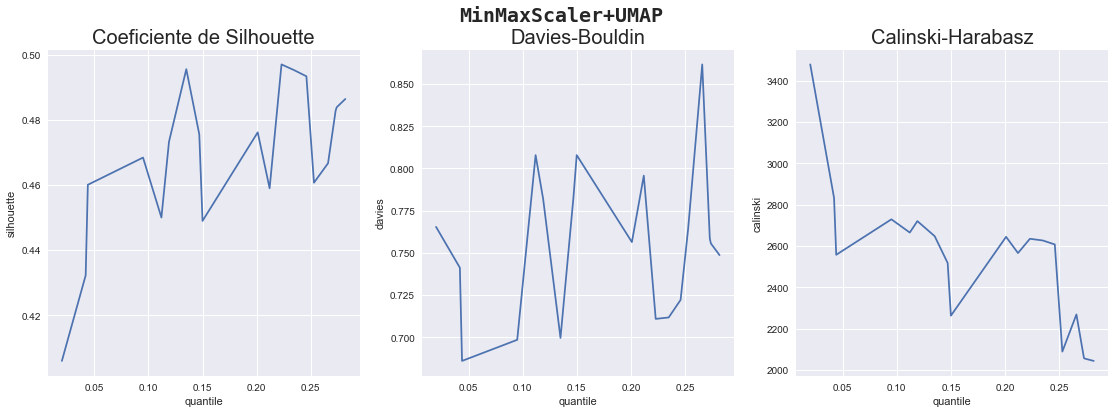

In [17]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_minmax_UMAP_2_features, 0.01, 0.35, (19,6),'MinMaxScaler+UMAP','MEANSHIFT','MinMaxScaler','UMAP')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,RobustScaler,UMAP,2,0.115,7,0.397964,0.724983,1554.638662
1,MEANSHIFT,RobustScaler,UMAP,2,0.174,3,0.443455,0.779293,1627.236340
2,MEANSHIFT,RobustScaler,UMAP,2,0.064,9,0.409231,0.870094,1784.770633
3,MEANSHIFT,RobustScaler,UMAP,2,0.086,7,0.395620,0.731972,1501.511358
4,MEANSHIFT,RobustScaler,UMAP,2,0.083,8,0.378674,0.776964,1519.142781
5,MEANSHIFT,RobustScaler,UMAP,2,0.131,4,0.359255,0.857689,1409.295608
6,MEANSHIFT,RobustScaler,UMAP,2,0.056,12,0.433405,0.719499,2037.793656
7,MEANSHIFT,RobustScaler,UMAP,2,0.132,4,0.358971,0.860744,1411.943616
8,MEANSHIFT,RobustScaler,UMAP,2,0.191,3,0.441814,0.785109,1616.796229
9,MEANSHIFT,RobustScaler,UMAP,2,0.116,7,0.400088,0.724827,1548.451203


Wall time: 11 s


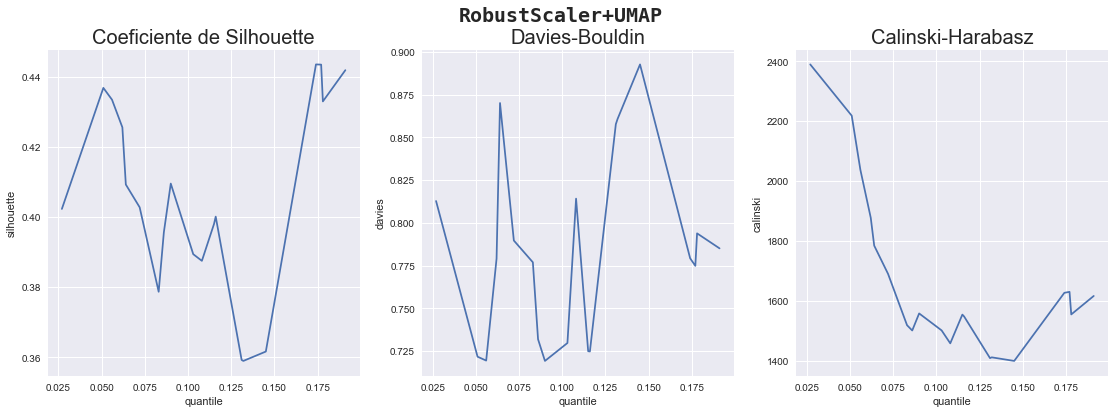

In [18]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_robust_UMAP_2_features, 0.01, 0.2, (19,6),'RobustScaler+UMAP','MEANSHIFT','RobustScaler','UMAP')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,PowerTransformer,UMAP,2,0.060,9,0.533194,0.541501,4461.407005
1,MEANSHIFT,PowerTransformer,UMAP,2,0.050,9,0.534009,0.540233,4352.343151
2,MEANSHIFT,PowerTransformer,UMAP,2,0.335,3,0.632007,0.494308,1720.691107
3,MEANSHIFT,PowerTransformer,UMAP,2,0.165,4,0.581755,0.337785,1332.048246
4,MEANSHIFT,PowerTransformer,UMAP,2,0.154,4,0.581755,0.337785,1332.048246
5,MEANSHIFT,PowerTransformer,UMAP,2,0.075,7,0.532806,0.588868,4111.757041
6,MEANSHIFT,PowerTransformer,UMAP,2,0.318,4,0.581755,0.337785,1332.048246
7,MEANSHIFT,PowerTransformer,UMAP,2,0.350,3,0.632007,0.494308,1720.691107
8,MEANSHIFT,PowerTransformer,UMAP,2,0.310,4,0.581755,0.337785,1332.048246
9,MEANSHIFT,PowerTransformer,UMAP,2,0.078,7,0.532370,0.589718,4124.837085


Wall time: 7.87 s


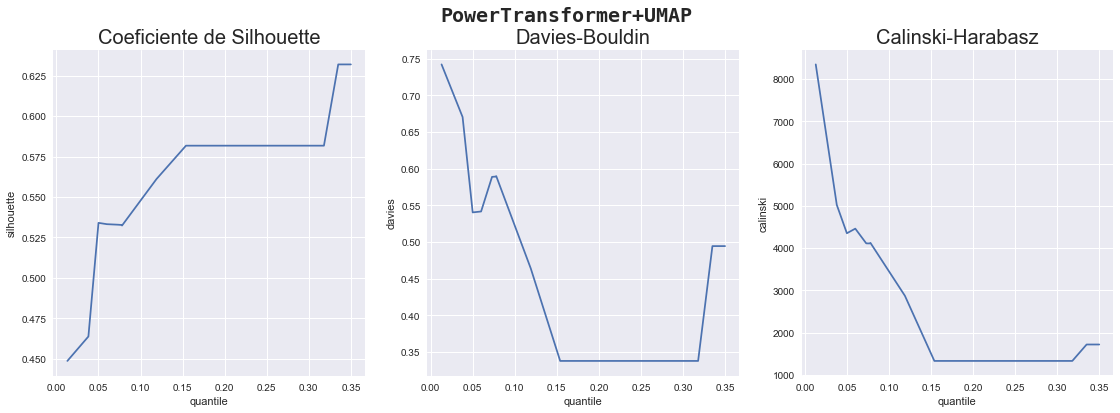

In [19]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_power_UMAP_2_features, 0.01, 0.35, (19,6),'PowerTransformer+UMAP','MEANSHIFT','PowerTransformer','UMAP')


## <a class="anchor" id="semr">2. Sem Redução</a>
[Retorna ao Indice](#etapas)

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,MinMaxScaler,SemRedução,17,0.107,47,0.039057,1.088740,27.166493
1,MEANSHIFT,MinMaxScaler,SemRedução,17,0.078,62,0.046445,1.057060,32.201345
2,MEANSHIFT,MinMaxScaler,SemRedução,17,0.119,43,0.061454,1.078152,26.603701
3,MEANSHIFT,MinMaxScaler,SemRedução,17,0.272,23,0.248719,0.976362,20.849085
4,MEANSHIFT,MinMaxScaler,SemRedução,17,0.230,30,0.059509,1.133282,19.815954
5,MEANSHIFT,MinMaxScaler,SemRedução,17,0.132,38,0.060633,1.174405,29.224185
6,MEANSHIFT,MinMaxScaler,SemRedução,17,0.108,47,0.036618,1.106206,27.137508
7,MEANSHIFT,MinMaxScaler,SemRedução,17,0.276,23,0.248547,0.975056,20.863651
8,MEANSHIFT,MinMaxScaler,SemRedução,17,0.040,86,0.084987,1.057145,39.517520
9,MEANSHIFT,MinMaxScaler,SemRedução,17,0.288,21,0.263114,0.995754,20.973869


Wall time: 45.3 s


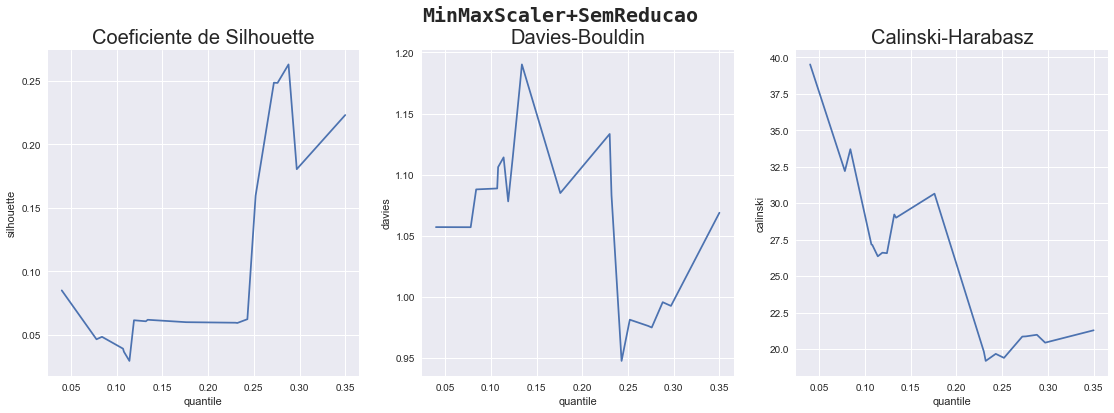

In [20]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_minmax_SemReducao_17_features, 0.01, 0.35, (19,6),'MinMaxScaler+SemReducao','MEANSHIFT','MinMaxScaler','SemRedução')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,RobustScaler,SemRedução,17,0.290,76,0.495433,0.534898,123.867248
1,MEANSHIFT,RobustScaler,SemRedução,17,0.129,86,0.409557,0.606026,120.700883
2,MEANSHIFT,RobustScaler,SemRedução,17,0.348,72,0.507002,0.549272,125.966124
3,MEANSHIFT,RobustScaler,SemRedução,17,0.276,78,0.486672,0.537593,122.004138
4,MEANSHIFT,RobustScaler,SemRedução,17,0.049,104,0.395114,0.587675,124.529405
5,MEANSHIFT,RobustScaler,SemRedução,17,0.234,81,0.414053,0.546225,121.865043
6,MEANSHIFT,RobustScaler,SemRedução,17,0.287,76,0.495433,0.534898,123.867248
7,MEANSHIFT,RobustScaler,SemRedução,17,0.129,86,0.409557,0.606026,120.700883
8,MEANSHIFT,RobustScaler,SemRedução,17,0.292,75,0.496015,0.528019,125.352118
9,MEANSHIFT,RobustScaler,SemRedução,17,0.237,81,0.414053,0.546225,121.865043


Wall time: 20.5 s


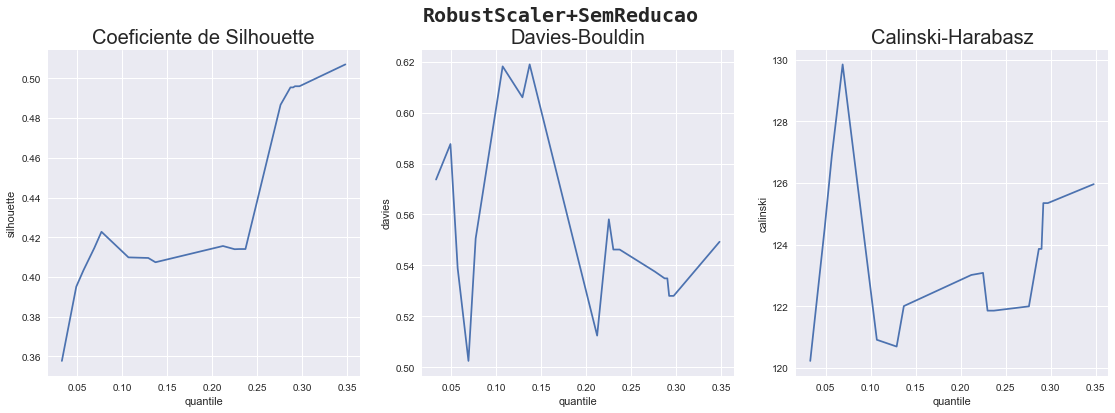

In [21]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_robust_SemReducao_17_features, 0.01, 0.35, (19,6),'RobustScaler+SemReducao','MEANSHIFT','RobustScaler','SemRedução')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
0,MEANSHIFT,PowerTransformer,SemRedução,17,0.237,6,0.321887,1.132801,37.446204
1,MEANSHIFT,PowerTransformer,SemRedução,17,0.034,15,0.179966,1.324558,51.244154
2,MEANSHIFT,PowerTransformer,SemRedução,17,0.166,8,0.247722,1.236186,46.294409
3,MEANSHIFT,PowerTransformer,SemRedução,17,0.284,6,0.321887,1.132801,37.446204
4,MEANSHIFT,PowerTransformer,SemRedução,17,0.080,11,0.161345,1.290265,35.114929
5,MEANSHIFT,PowerTransformer,SemRedução,17,0.017,18,0.109168,1.749882,58.520576
6,MEANSHIFT,PowerTransformer,SemRedução,17,0.295,6,0.321887,1.132801,37.446204
7,MEANSHIFT,PowerTransformer,SemRedução,17,0.172,7,0.252532,1.252480,53.494863
8,MEANSHIFT,PowerTransformer,SemRedução,17,0.255,6,0.321887,1.132801,37.446204
9,MEANSHIFT,PowerTransformer,SemRedução,17,0.267,6,0.321887,1.132801,37.446204


Wall time: 14.6 s


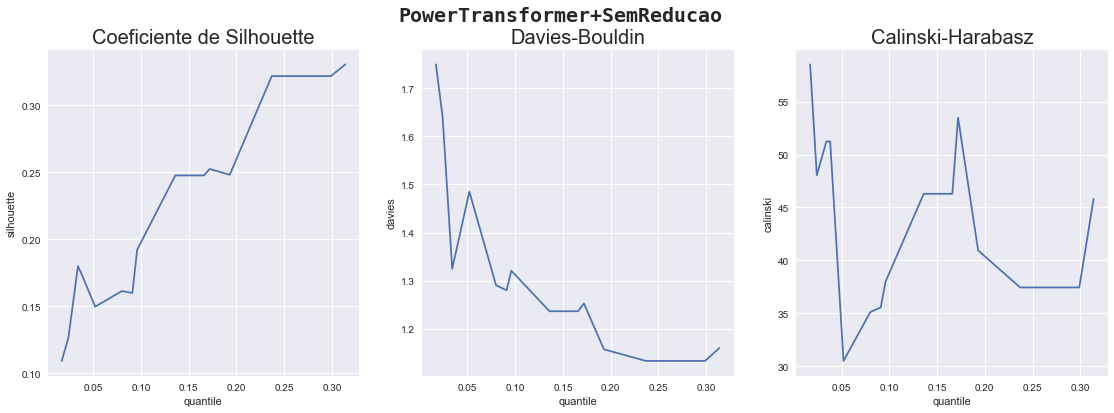

In [22]:
%%time
df_score,df_score_local,centro_clusters=mf.plot_inertia_sillhoutte_meanshift(df_score,df_power_SemReducao_17_features, 0.01, 0.35, (19,6),'PowerTransformer+SemReducao','MEANSHIFT','PowerTransformer','SemRedução')


## <a class="anchor" id="analise">3. Análise do dataframe df_score</a>
[Retorna ao Indice](#etapas)

In [23]:
df_score[df_score['silhouette']>0.50].sort_values(by='silhouette', ascending=True)

,Algor.,Transf.,Red.Dim.,Features,quantile,clusters,silhouette,davies,calinski
2,MEANSHIFT,RobustScaler,SemRedução,17,0.348,72,0.507002,0.549272,125.966124
8,MEANSHIFT,RobustScaler,PCA,9,0.134,81,0.507597,0.519010,188.641279
10,MEANSHIFT,RobustScaler,PCA,9,0.187,79,0.509024,0.499968,166.069089
0,MEANSHIFT,MinMaxScaler,PCA,9,0.835,3,0.513884,0.955855,13.012338
17,MEANSHIFT,MinMaxScaler,PCA,9,0.825,3,0.513884,0.955855,13.012338
6,MEANSHIFT,MinMaxScaler,PCA,9,0.813,3,0.513884,0.955855,13.012338
1,MEANSHIFT,RobustScaler,PCA,9,0.286,74,0.515510,0.527457,158.485953
9,MEANSHIFT,PowerTransformer,UMAP,2,0.078,7,0.532370,0.589718,4124.837085
15,MEANSHIFT,PowerTransformer,UMAP,2,0.077,7,0.532720,0.589024,4111.693577
5,MEANSHIFT,PowerTransformer,UMAP,2,0.075,7,0.532806,0.588868,4111.757041


In [24]:
         
#Selecionado após testes: UMAP c/ PowerTransformer
#silhoutte=0.5533
#davies=0.5415
#calinski=4461.40
#quantile=0.060
#clusters=9

In [26]:
bandwidth = estimate_bandwidth(df_power_UMAP_2_features, quantile=0.060, n_samples=500)  
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_power_UMAP_2_features)
labels = ms.labels_
centro_clusters = ms.cluster_centers_


In [27]:
df_clusters = pd.DataFrame(labels)
df_temp= df_power_UMAP_2_features.merge(df_clusters, left_index=True, right_index=True)
df_temp.rename({0: 'cluster'}, axis=1, inplace=True)
round(df_temp['cluster'].value_counts(normalize=True)*100,2)

0    23.70
1    20.87
2    15.98
3    10.92
4     8.32
5     6.57
6     5.97
7     3.92
8     3.74
Name: cluster, dtype: float64

In [28]:
#Atach clusters ao dataset
df_clusters = pd.DataFrame(labels)
df_abt= df_abt.merge(df_clusters, left_index=True, right_index=True)
df_abt.rename({0: 'cluster'}, axis=1, inplace=True)

In [29]:
df_abt_sc= df_abt_sc.merge(df_clusters, left_index=True, right_index=True)
df_abt_sc.rename({0: 'cluster'}, axis=1, inplace=True)


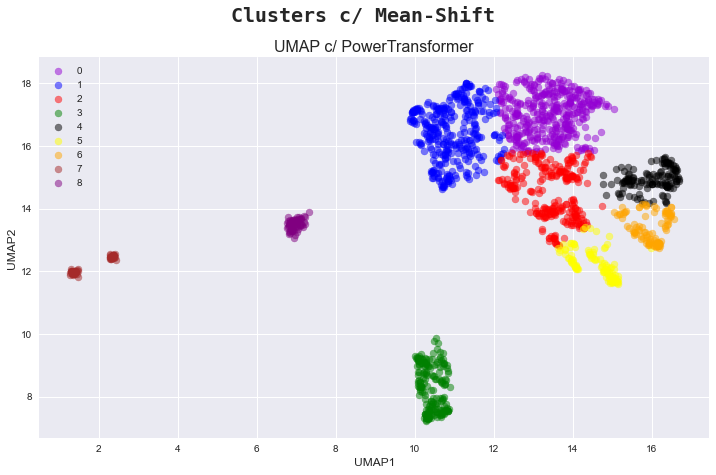

In [31]:

plt.style.use('seaborn')
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('UMAP1', fontsize=12)
ax.set_ylabel('UMAP2', fontsize=12)
ax.set_title('UMAP c/ PowerTransformer', fontsize= 16)
 
targets = [0, 1, 2, 3, 4, 5, 6, 7, 8 ]
colors = ['darkviolet','blue','red','green','black','yellow','orange','brown','purple']
for target, color in zip(targets, colors):
    indicesToKeep = df_temp['cluster'] == target
    ax.scatter(df_temp.loc[indicesToKeep, 'TUMAP1'],
               df_temp.loc[indicesToKeep, 'TUMAP2'], c=color, s=50, alpha=0.5)

plt.suptitle('Clusters c/ Mean-Shift', fontsize = 20, fontname = 'monospace', weight = 'bold')    
ax.legend(targets)
#ax.grid()

In [32]:
df_score.to_excel(caminho_temp+'03_03_Modelos_MeanShift_df_score.xlsx', index=True)

In [33]:
df_abt.to_excel(caminho_temp+'03_03_Modelos_MeanShift_df_abt_ms_cluster.xlsx', index=True)

In [34]:
df_abt_sc.to_excel(caminho_temp+'03_03_Modelos_MeanShift_df_abt_sc_ms.xlsx', index=True)
